In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pyBigWig
import pysam
from tqdm import tqdm

# Barn25

### Knee plot

In [2]:
read_counts = pd.read_csv('Barn25/readcounts.csv')
read_counts = read_counts.sort_values(by='read_count', ascending=False)
read_counts

,barcode,read_count
7,GGTCTCATAGGATACAGCAGACTCCATCGTTGAAGGTTGGATGCA,8292185
6,TATCAGCCAGGAAGGCATTGACTCACAGTAGCAAGGGTTACGGTA,942970
521,CGACAGTAAGGAAACGATGGACTCTGTTGGACAAGGTTGGATGCA,653815
11,CGCTAGTTAGGAAAGGTGACACTCAGACACCAAAGGACATCGTCA,645397
1,ATATGCGGAGGAGGAACCAAACTCGTGTGATGAAGGGTTACGGTA,637514
...,...,...
25813,TGTGGTTGAGGAAACGATGGACTCAGGACATCAAGGTGGTCTCAA,2
25814,CAACCAACAGGACCATACGAACTCACAGTAGCAAGGTTGGATGCA,2
25815,AATGGCAGAGGAAGGCATTGACTCCACCATCTAAGGCGGTTGATA,2
25819,AGGTCCAAAGGACCATACGAACTCCACCATCTAAGGTTGATGGCA,2


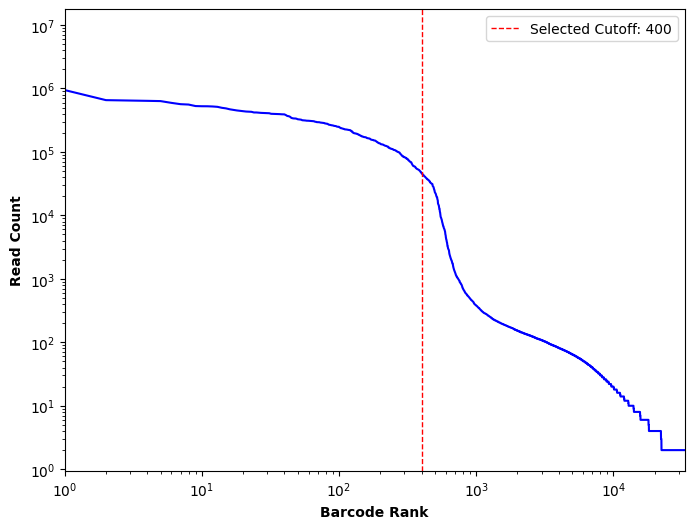

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(read_counts['barcode'].to_numpy(), read_counts['read_count'].to_numpy(), linestyle='-', color='blue')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,len(read_counts['barcode']))
plt.axvline(x=400, color='red', label=f'Selected Cutoff: 400', 
            linestyle='--', linewidth=1)
plt.xlabel('Barcode Rank', fontdict={'weight':'bold'})
plt.ylabel('Read Count', fontdict={'weight':'bold'})
plt.legend()
plt.savefig('Barn25/kneeplot.png', dpi=300, bbox_inches='tight')
plt.savefig('Barn25/kneeplot.pdf', bbox_inches='tight')

In [4]:
real_cells = read_counts.iloc[:400]['barcode']
real_cells.to_csv('Barn25/real_cells.txt', index=False, header=False)

### Barnyard

In [5]:
barnyard = pd.read_csv('Barn25/barnyard.csv')
barnyard

,barcode,mouse_count,human_count
0,AATGGCAGAGGAAACGATGGACTCACAGTAGCAAGGCATACCGTA,2,0
1,AATGGCAGAGGAAACGATGGACTCACAGTAGCAAGGGACAGCATA,2,4
2,AATGGCAGAGGAAACGATGGACTCAGAATGCCAAGGGTGACTCTA,0,2
3,AATGGCAGAGGAAACGATGGACTCAGAATGCCAAGGGTTACGGTA,0,4
4,AATGGCAGAGGAAACGATGGACTCAGACACCAAAGGCACTGACAA,2,0
...,...,...,...
32692,TGTGGTTGAGGATTGGTAGCACTCTGCTATGGAAGGGATGGTCTA,0,2
32693,TGTGGTTGAGGATTGGTAGCACTCTGCTATGGAAGGTGGTCTCAA,0,2
32694,TGTGGTTGAGGATTGGTAGCACTCTGTTGGACAAGGAGATACCGA,0,2
32695,TGTGGTTGAGGATTGGTAGCACTCTGTTGGACAAGGGTCGGTAAA,12,6


In [6]:
barnyard = pd.read_csv('Barn25/barnyard.csv')
real_cells = set(real_cells)

barnyard['ratio'] = barnyard['human_count']/barnyard['mouse_count']

def cat(row):
    if row['barcode'] not in real_cells:
        return 'empty droplet'
    elif row['ratio']>25:
        return 'human'
    elif row['ratio']<0.2:
        return 'mouse'        
    elif 0.2 <= row['ratio'] <= 25:
        return 'mixed'

barnyard['cell']=barnyard.apply(cat, axis=1)
# barnyard[(barnyard['ratio']>100) & (barnyard['ratio']!=np.inf)]
print(len(barnyard[barnyard['cell']=='mixed']))


13


In [7]:
color_map={
    'empty droplet':'slategrey',
    'human':'crimson',
    'mouse':'royalblue',
    'mixed':'gold'
}

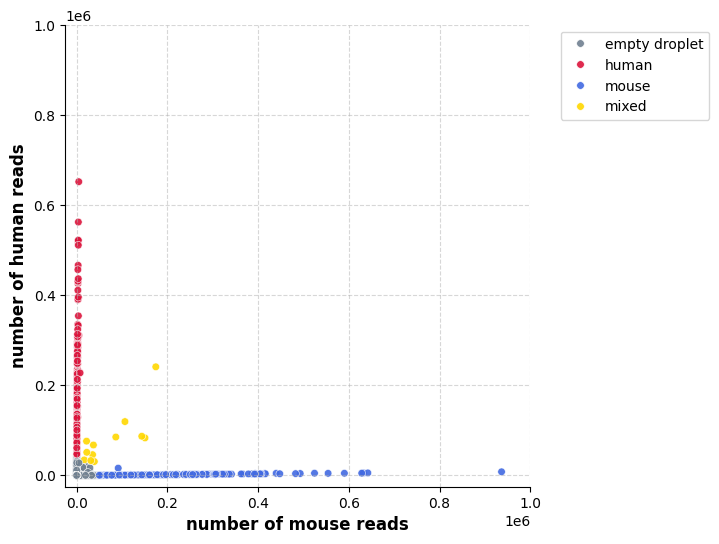

In [8]:
# Plot using seaborn
plt.figure(figsize=(6, 6), #dpi=600
          )
scatter_plot = sns.scatterplot(
    data=barnyard,
    x='mouse_count',
    y='human_count',
    hue='cell',        # Color by the categorical column
    palette=color_map,        # Use a categorical color palette
    s=30,                 # Set point size
    alpha=0.9,              # Transparency
    # edgecolor='black'
)

# Enhance the plot
# scatter_plot.set_title('Barnyard')
scatter_plot.set_xlabel('number of mouse reads', fontdict={'weight':'bold','size':12})
scatter_plot.set_ylabel('number of human reads', fontdict={'weight':'bold','size':12})
plt.legend(title='', loc='upper right', bbox_to_anchor=(1.4, 1))
sns.despine()
plt.xlim(-25000,1000000)
plt.ylim(-25000,1000000)
plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()

plt.savefig('Barn25/Barn25.png', dpi=600, bbox_inches='tight')
plt.savefig('Barn25/Barn25.pdf', bbox_inches='tight')

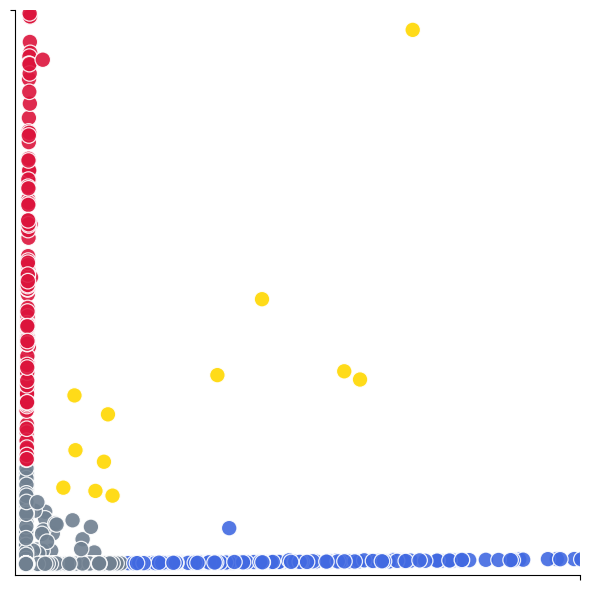

In [9]:
# Plot using seaborn
plt.figure(figsize=(6, 6), #dpi=600
          )
scatter_plot = sns.scatterplot(
    data=barnyard,
    x='mouse_count',
    y='human_count',
    hue='cell',        # Color by the categorical column
    palette=color_map,        # Use a categorical color palette
    s=125,                 # Set point size
    alpha=0.9,              # Transparency
    # edgecolor='black'
    legend=None
)

# scatter_plot.set_title('Barnyard')
scatter_plot.set_xlabel('')
scatter_plot.set_ylabel('')
scatter_plot.set_xticks([250000])
scatter_plot.set_yticks([250000])
scatter_plot.set_xticklabels('')
scatter_plot.set_yticklabels('')

sns.despine()
plt.xlim(-5000,250000)
plt.ylim(-5000,250000)

# plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('Barn25/Barn25_zoom.png', dpi=600, bbox_inches='tight')
plt.savefig('Barn25/Barn25_zoom.pdf', bbox_inches='tight')


In [10]:
barnyard[barnyard['cell']=='human']['barcode'].to_csv('Barn25/human_cells.txt', index=False, header=False)
barnyard[barnyard['cell']=='mouse']['barcode'].to_csv('Barn25/mouse_cells.txt', index=False, header=False)

### Genome Coverage

In [11]:
mouse_coverage = pd.read_csv('Barn25/mouse_sc_outs/coverages.csv')
mouse_coverage['species']='mouse'
# mouse_coverage

In [12]:
human_coverage = pd.read_csv('Barn25/human_sc_outs/coverages.csv')
human_coverage['species']='human'
# human_coverage

In [13]:
coverages = pd.concat([human_coverage, mouse_coverage])
# coverages

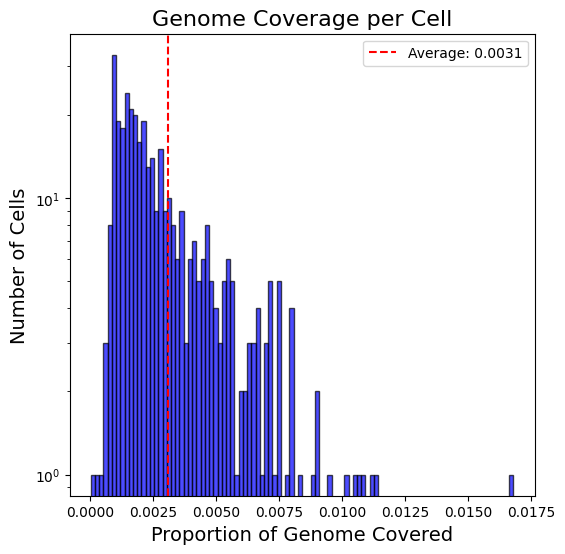

In [14]:
average_coverage = coverages['coverage'].mean()

plt.figure(figsize=(6, 6))
plt.hist(coverages['coverage'], bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(average_coverage, color='red', linestyle='dashed', linewidth=1.5, label=f'Average: {average_coverage:.4f}')
# plt.axvline(max_cov_sc, color='green', linestyle='dashed', linewidth=1.5, label=f'Theoretical Max Average: {max_cov_sc:.4f}')

plt.yscale('log')

plt.title('Genome Coverage per Cell', fontsize=16)
plt.xlabel('Proportion of Genome Covered', fontsize=14)
plt.ylabel('Number of Cells', fontsize=14)

plt.legend()

# Barn 10

### Knee plot

In [15]:
read_counts = pd.read_csv('Barn10/readcounts.csv')
read_counts = read_counts.sort_values(by='read_count', ascending=False)
read_counts

,barcode,read_count
5,GTGTAAGCAGGAAACGATGGACTCCGAACTTGAAGGGTTACGGTA,31195320
84,ATATGCGGAGGACACCTTGAACTCGTGTGATGAAGGTTCCACTCA,18996300
2,ATATGCGGAGGATACAGCAGACTCAGACACCAAAGGCTGTGAACA,9441622
100,CGCTAGTTAGGAAGGCTAACACTCAGGACATCAAGGTGGTCTCAA,9422314
21,GTGAGACTAGGAAACGATGGACTCAGACGAACAAGGTTGATGGCA,7126524
...,...,...
14478,CAACTTGCAGGAAACGATGGACTCAGGTCGTAAAGGTCCTCAACA,2
14479,ATCGACAGAGGAGGAACCAAACTCCATCGTTGAAGGCACTGACAA,2
14481,CGACAGTAAGGAAGATGGTCACTCTGCTATGGAAGGAGATACCGA,2
22418,GTAATGCCAGGAAGACCGATACTCCACCATCTAAGGCATACCGTA,2


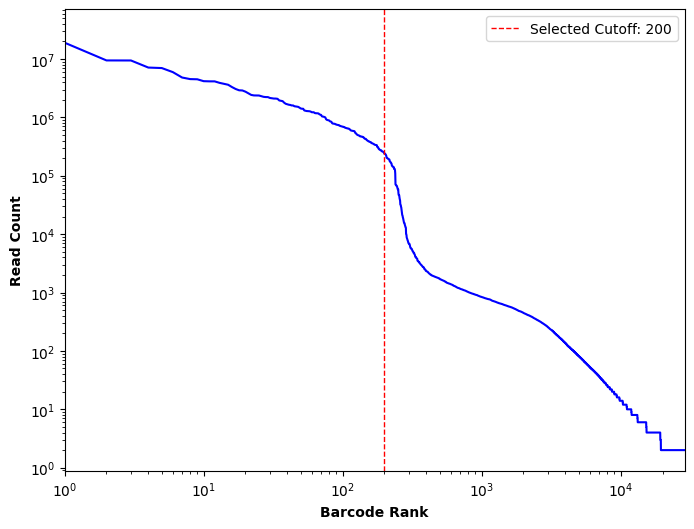

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(read_counts['barcode'].to_numpy(), read_counts['read_count'].to_numpy(), linestyle='-', color='blue')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,len(read_counts['barcode']))
plt.axvline(x=200, color='red', label=f'Selected Cutoff: 200', 
            linestyle='--', linewidth=1)
plt.xlabel('Barcode Rank', fontdict={'weight':'bold'})
plt.ylabel('Read Count', fontdict={'weight':'bold'})
plt.legend()
plt.savefig('Barn10/figures/kneeplot.png', dpi=600, bbox_inches='tight')
plt.savefig('Barn10/figures/kneeplot.pdf', bbox_inches='tight')


In [17]:
real_cells = read_counts.iloc[:200]['barcode']
real_cells.to_csv('Barn10/real_cells.txt', index=False, header=False)

### Histogram version

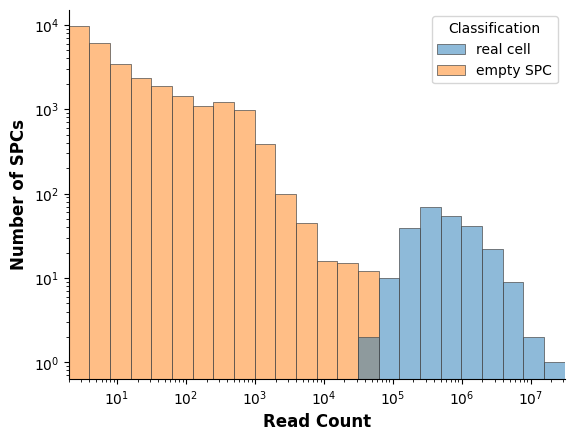

In [18]:
read_counts = pd.read_csv('Barn10/readcounts.csv')
read_counts['Classification'] = ['real cell' if x else 'empty SPC' for x in read_counts['read_count'].rank(method='first', ascending=False) <= 250]

bins = np.logspace(np.log10(read_counts["read_count"].min()),np.log10(read_counts["read_count"].max()),25)
hist = sns.histplot(read_counts, 
                    x="read_count", 
                    hue="Classification",
                    bins=bins,
                    linewidth=.5,
                    # palette="light:g",
                    edgecolor=".3",
                   )

plt.yscale('log')
plt.xscale('log')
hist.set_xlabel('Read Count', fontdict={'weight':'bold','size':12})
hist.set_ylabel('Number of SPCs', fontdict={'weight':'bold','size':12})
# plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.xlim(2, read_counts["read_count"].max())
plt.savefig('Barn10/figures/Barn10_readcount_hist.png', dpi=600, bbox_inches='tight')
plt.savefig('Barn10/figures/Barn10_readcount_hist.pdf', bbox_inches='tight')

### Read Counts vs. Read Lengths

In [19]:
lengths_df = pd.read_csv('Barn10/counts_lengths.csv')
lengths_df = pd.merge(lengths_df, read_counts[['barcode','Classification']], on='barcode', how='left')
lengths_df.sort_values('read_count', ascending=False)

,barcode,read_count,unique_read_count,average_insert_length,Classification
22060,GTGTAAGCAGGAAACGATGGACTCCGAACTTGAAGGGTTACGGTA,15215756,10885201.0,231.653191,real cell
6849,ATATGCGGAGGACACCTTGAACTCGTGTGATGAAGGTTCCACTCA,9332615,6888671.0,232.221090,real cell
7433,ATATGCGGAGGATACAGCAGACTCAGACACCAAAGGCTGTGAACA,4627892,3400148.0,233.496774,real cell
12809,CGCTAGTTAGGAAGGCTAACACTCAGGACATCAAGGTGGTCTCAA,4608014,3425972.0,233.357088,real cell
19210,GTGAGACTAGGAAACGATGGACTCAGACGAACAAGGTTGATGGCA,3513590,2553074.0,238.739987,real cell
...,...,...,...,...,...
20145,GTGAGACTAGGACGACATTCACTCCAGGTGAAAAGGGATGGTCTA,1,1.0,234.000000,empty SPC
20147,GTGAGACTAGGACGACATTCACTCCAGGTGAAAAGGGTTACGGTA,1,1.0,66.000000,empty SPC
9207,CAACCAACAGGACACCTTGAACTCCGCCAATAAAGGCTGTGAACA,1,1.0,62.000000,empty SPC
9209,CAACCAACAGGACACCTTGAACTCCGCCAATAAAGGTTCCACTCA,1,1.0,297.000000,empty SPC


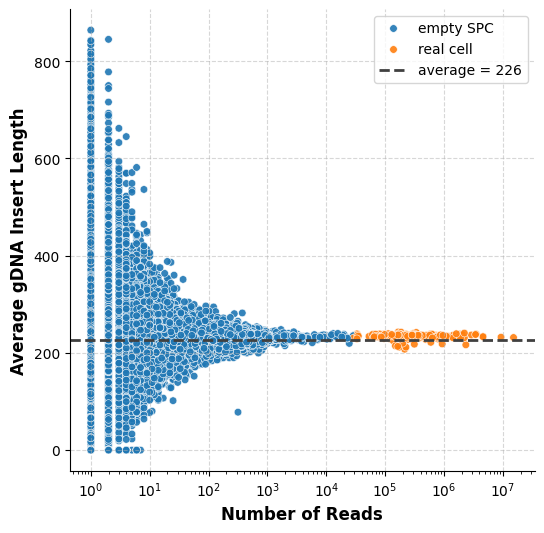

In [20]:
# Plot using seaborn
plt.figure(figsize=(6, 6), #dpi=600
          )
scatter_plot = sns.scatterplot(
    data=lengths_df,
    x='read_count',
    y='average_insert_length',
    hue='Classification',        # Color by the categorical column
    # palette=color_map,        # Use a categorical color palette
    s=30,                 # Set point size
    alpha=0.9,              # Transparency
    # edgecolor='black'
)

# Enhance the plot
# scatter_plot.set_title('=')
scatter_plot.set_xlabel('Number of Reads', fontdict={'weight':'bold','size':12})
scatter_plot.set_ylabel('Average gDNA Insert Length', fontdict={'weight':'bold','size':12})
# plt.legend(title='', loc='upper right', bbox_to_anchor=(1.4, 1))
av = lengths_df['average_insert_length'].mean()
plt.axhline(y=av, color='.25', label=f'average = {av:.0f}', 
            linestyle='--', linewidth=2)
plt.legend()
sns.despine()
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(-25000,1000000)
# plt.ylim(-10,300)
plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()

# plt.savefig('Barn25/Barn25.png', dpi=600, bbox_inches='tight')
# plt.savefig('Barn25/Barn25.pdf', bbox_inches='tight')

In [21]:
pal = {
    'empty_dup' : sns.color_palette('pastel')[0],
    'empty_uni' : sns.color_palette('muted')[0],
    'spc_dup' : sns.color_palette('pastel')[1],
    'spc_uni' : sns.color_palette('muted')[1]
 }
pal['spc_uni']

(0.9333333333333333, 0.5215686274509804, 0.2901960784313726)

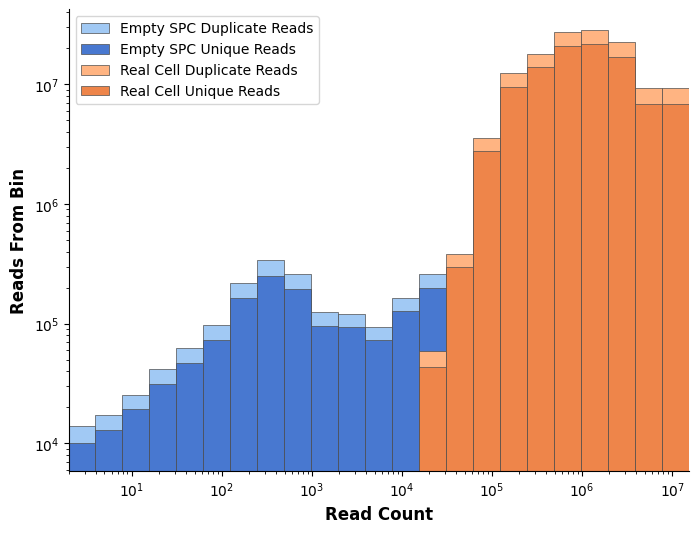

In [22]:
bins = np.logspace(np.log10(lengths_df["read_count"].min()),np.log10(lengths_df["read_count"].max()),25)

fig,ax=plt.subplots(1,1,figsize=(8,6))
# Plot empties
plt.hist(lengths_df[lengths_df['Classification']=='empty SPC']['read_count'],
            weights=lengths_df[lengths_df['Classification']=='empty SPC']['read_count'],
            bins=bins,
            linewidth=.5,
            edgecolor=".3",
            color=pal['empty_dup'],
            label='Empty SPC Duplicate Reads'
           )
plt.hist(lengths_df[lengths_df['Classification']=='empty SPC']['read_count'],
            weights=lengths_df[lengths_df['Classification']=='empty SPC']['unique_read_count'],
            bins=bins,
            linewidth=.5,
            edgecolor=".3",
            color=pal['empty_uni'],
            label='Empty SPC Unique Reads'
           )
# plot occupied
plt.hist(lengths_df[lengths_df['Classification']=='real cell']['read_count'],
            weights=lengths_df[lengths_df['Classification']=='real cell']['read_count'],
            bins=bins,
            linewidth=.5,
            edgecolor=".3",
            color=pal['spc_dup'],
            label='Real Cell Duplicate Reads'
           )
plt.hist(lengths_df[lengths_df['Classification']=='real cell']['read_count'],
            weights=lengths_df[lengths_df['Classification']=='real cell']['unique_read_count'],
            bins=bins,
            linewidth=.5,
            edgecolor=".3",
            color=pal['spc_uni'],
            label='Real Cell Unique Reads'
           )

plt.yscale('log')
plt.xscale('log')
ax.set_xlabel('Read Count', fontdict={'weight':'bold','size':12})
ax.set_ylabel('Reads From Bin', fontdict={'weight':'bold','size':12})
sns.despine()
plt.xlim(2, lengths_df["read_count"].max())
plt.legend()
plt.savefig('Barn10/figures/Barn10_weighted_hist.png', dpi=600, bbox_inches='tight')
plt.savefig('Barn10/figures/Barn10_weighted_hist.pdf', bbox_inches='tight')

In [44]:
empty = lengths_df[lengths_df['Classification']=='empty SPC']
empty[(empty['unique_read_count'] / empty['read_count'] < 0.75) & (empty['read_count'] > 100)]

,barcode,read_count,unique_read_count,average_insert_length,Classification
8,AATGGCAGAGGAAACGATGGACTCAGACACCAAAGGCATACCGTA,149,111.0,262.830986,empty SPC
20,AATGGCAGAGGAAACGATGGACTCAGGTCGTAAAGGTTCCACTCA,189,131.0,210.740331,empty SPC
28,AATGGCAGAGGAAACGATGGACTCCGAACTTGAAGGTCCTCAACA,450,328.0,236.536471,empty SPC
29,AATGGCAGAGGAAACGATGGACTCCGCCAATAAAGGCATACCGTA,128,95.0,211.529915,empty SPC
35,AATGGCAGAGGAAACGATGGACTCTAACGGAGAAGGTTGGATGCA,271,195.0,227.642857,empty SPC
...,...,...,...,...,...
28143,TGTGGTTGAGGATTGGTAGCACTCAGACGAACAAGGGTAACCGAA,124,91.0,254.394958,empty SPC
28145,TGTGGTTGAGGATTGGTAGCACTCAGCATTGGAAGGGTTACGGTA,520,384.0,238.496016,empty SPC
28147,TGTGGTTGAGGATTGGTAGCACTCCACCATCTAAGGCATACCGTA,295,207.0,230.136201,empty SPC
28154,TGTGGTTGAGGATTGGTAGCACTCTAACGGAGAAGGCGACCTATA,164,117.0,244.190789,empty SPC


### Barnyard

In [23]:
barnyard = pd.read_csv('Barn10/barnyard.csv')
barnyard

,barcode,mouse_count,human_count
0,AAGGCTTGAGGAAGGCATTGACTCAGGTCGTAAAGGTGGTCTCAA,2,0
1,AAGGCTTGAGGAGGAACCAAACTCTCCAGTCTAAGGTTGATGGCA,2,0
2,AATGGCAGAGGAAACGATGGACTCACAGTAGCAAGGGACAGCATA,8,0
3,AATGGCAGAGGAAACGATGGACTCACAGTAGCAAGGGTGACTCTA,7,0
4,AATGGCAGAGGAAACGATGGACTCACAGTAGCAAGGGTTACGGTA,2,0
...,...,...,...
28178,TGTGGTTGAGGATTGGTAGCACTCTATGCGACAAGGGTCGGTAAA,14,16
28179,TGTGGTTGAGGATTGGTAGCACTCTATGCGACAAGGGTTACGGTA,79,89
28180,TGTGGTTGAGGATTGGTAGCACTCTATGCGACAAGGTTGGATGCA,0,2
28181,TGTGGTTGAGGATTGGTAGCACTCTCTGGAACAAGGCGACCTATA,0,2


In [24]:
real_cells = set(real_cells)

barnyard['ratio'] = barnyard['human_count']/barnyard['mouse_count']

def cat(row):
    if row['barcode'] not in real_cells:
        return 'empty droplet'
    elif row['ratio']>10:
        return 'human'
    elif row['ratio']<0.2:
        return 'mouse'        
    elif 0.2 <= row['ratio'] <= 10:
        return 'mixed'

barnyard['cell']=barnyard.apply(cat, axis=1)
# barnyard[(barnyard['ratio']>100) & (barnyard['ratio']!=np.inf)]
print(len(barnyard[barnyard['cell']=='mixed']))


6


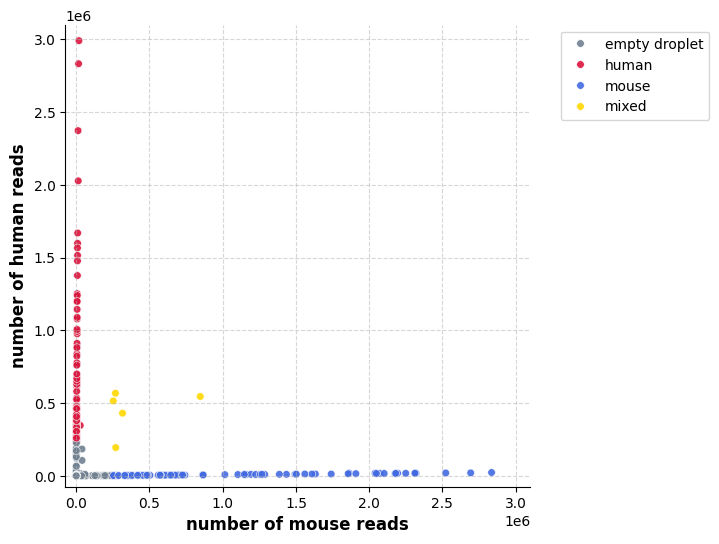

In [25]:
# Plot using seaborn
plt.figure(figsize=(6, 6), #dpi=600
          )
scatter_plot = sns.scatterplot(
    data=barnyard,
    x='mouse_count',
    y='human_count',
    hue='cell',        # Color by the categorical column
    palette=color_map,        # Use a categorical color palette
    s=30,                 # Set point size
    alpha=0.9,              # Transparency
    # edgecolor='black'
)

# Enhance the plot
# scatter_plot.set_title('Barnyard')
scatter_plot.set_xlabel('number of mouse reads', fontdict={'weight':'bold','size':12})
scatter_plot.set_ylabel('number of human reads', fontdict={'weight':'bold','size':12})
plt.legend(title='', loc='upper right', bbox_to_anchor=(1.4, 1))
sns.despine()
plt.xlim(-75000,3100000)
plt.ylim(-75000,3100000)
plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# 
plt.savefig('Barn10/figures/Barn10.png', dpi=600, bbox_inches='tight')
plt.savefig('Barn10/figures/Barn10.pdf', bbox_inches='tight')


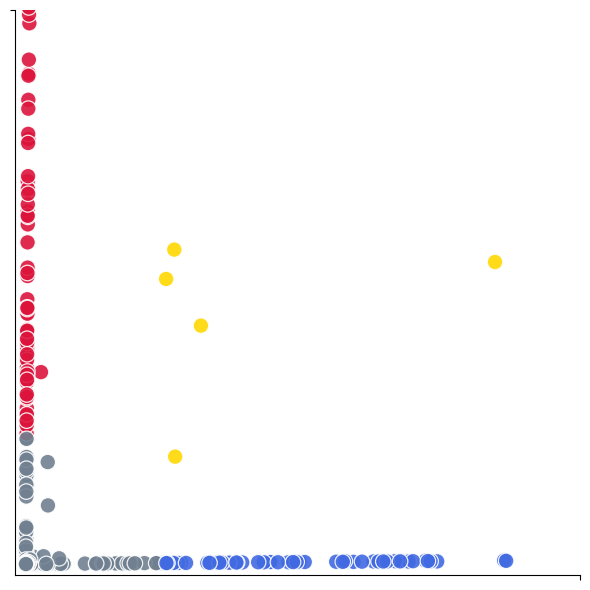

In [26]:
plt.figure(figsize=(6, 6), #dpi=600
          )
scatter_plot = sns.scatterplot(
    data=barnyard,
    x='mouse_count',
    y='human_count',
    hue='cell',        # Color by the categorical column
    palette=color_map,        # Use a categorical color palette
    s=125,                 # Set point size
    alpha=0.9,              # Transparency
    # edgecolor='black'
    legend=None
)

# scatter_plot.set_title('Barnyard')
scatter_plot.set_xlabel('')
scatter_plot.set_ylabel('')
scatter_plot.set_xticks([1000000])
scatter_plot.set_yticks([1000000])
scatter_plot.set_xticklabels('')
scatter_plot.set_yticklabels('')

sns.despine()
plt.xlim(-20000,1000000)
plt.ylim(-20000,1000000)

# plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# 
plt.savefig('Barn10/figures/Barn10_zoom.png', dpi=600, bbox_inches='tight')
plt.savefig('Barn10/figures/Barn10_zoom.pdf', bbox_inches='tight')


In [27]:
barnyard[barnyard['cell']=='human']['barcode'].to_csv('Barn10/human_cells.txt', index=False, header=False)
barnyard[barnyard['cell']=='mouse']['barcode'].to_csv('Barn10/mouse_cells.txt', index=False, header=False)

### Genome Coverage

In [28]:
mouse_coverage = pd.read_csv('Barn10/mouse_sc_outs/coverages.csv')
mouse_coverage['species']='mouse'
# mouse_coverage

In [29]:
human_coverage = pd.read_csv('Barn10/human_sc_outs/coverages.csv')
human_coverage['species']='human'
# human_coverage

In [30]:
coverages = pd.concat([human_coverage, mouse_coverage])
# coverages

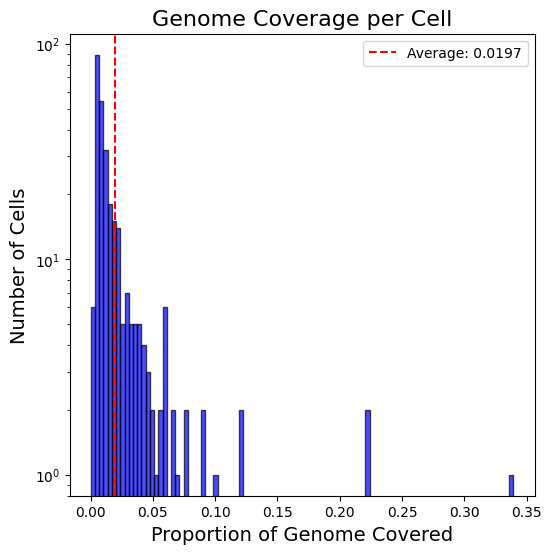

In [31]:
average_coverage = coverages['coverage'].mean()

plt.figure(figsize=(6, 6))
plt.hist(coverages['coverage'], bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(average_coverage, color='red', linestyle='dashed', linewidth=1.5, label=f'Average: {average_coverage:.4f}')
# plt.axvline(max_cov_sc, color='green', linestyle='dashed', linewidth=1.5, label=f'Theoretical Max Average: {max_cov_sc:.4f}')

plt.yscale('log')

plt.title('Genome Coverage per Cell', fontsize=16)
plt.xlabel('Proportion of Genome Covered', fontsize=14)
plt.ylabel('Number of Cells', fontsize=14)

plt.legend()